In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-translated-urdu-reviews/imdb_urdu_reviews_test.csv
/kaggle/input/imdb-dataset-of-50k-movie-translated-urdu-reviews/imdb_urdu_reviews_train.csv


## 1. Install  Required Libraries

In [58]:
!pip install urduhack

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## 2. Import Libraries

In [59]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

### 2.1 Urduhack

Urduhack is a NLP library for urdu language. It comes with a lot of battery included features to help you process Urdu data in the easiest way possible.
 
https://docs.urduhack.com/en/stable/



In [60]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

## 3. Load Dataset
Dataset is available in 2 sets:
* Training
* Testing

In [61]:
train_data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-translated-urdu-reviews/imdb_urdu_reviews_train.csv")
test_data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-translated-urdu-reviews/imdb_urdu_reviews_test.csv")

train_data.head(), test_data.head()

(                                              review sentiment
 0  میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...  positive
 1  چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...  negative
 2  ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...  positive
 3  مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...  negative
 4  یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...  positive,
                                               review sentiment
 0  یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...  negative
 1  بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...  negative
 2  یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...  negative
 3  اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...  positive
 4  پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...  positive)

In [62]:
# Combine Both Files to Preprocess 
data =  pd.concat([train_data, test_data]).reset_index(drop=True)
print(data.shape)


(50000, 2)


Make Copy of dataset so we dont have to load again and again

In [63]:
# Make copy of a dataset
df =  data.copy()
df

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive
...,...,...
49995,اگر آپ چیخنا چاہتے ہو یا بڑے اسٹوڈیو ہارر پراڈ...,positive
49996,براہ راست یہ ایک محض ایک چھوٹی سی چھوٹی چھوٹی ...,positive
49997,میں نے اس فلم کو کل رات آدھی رات کو چپکے سے پہ...,negative
49998,دیکھنا کوئی آسان فلم نہیں ہے - یہ ساڑھے تین گھ...,positive


We have now 50,000 records available in our dataset. The size of dataset is good and we can build very good predictive model using this data.

Lets see the distribution of label column which is sentiment.

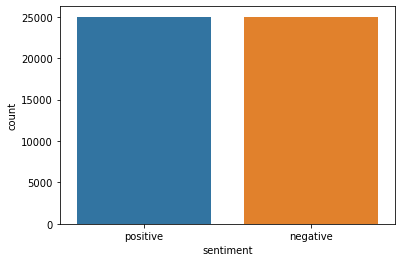

In [64]:
sns.countplot( x = 'sentiment', data = df );

We can see that there are only two classes in our dataset:

* Positive means the review holds positive sentiment.
* Negative means the review holds negative sentiment.

Also the class is very balanced. So, it will be easy for us to build any model.

To show sentence lenghts we use the code below

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset into a DataFrame (replace 'filename.csv' with the actual file path)
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-translated-urdu-reviews/imdb_urdu_reviews_train.csv')

# Assuming 'review' column contains the text data, split the reviews into sentences
df['sentences'] = df['review'].apply(lambda x: x.split('.'))  # Splitting by periods to separate sentences

# Calculate the length of each sentence and store it in a new column 'sentence_lengths'
df['sentence_lengths'] = df['sentences'].apply(lambda x: [len(sentence.split()) for sentence in x])

# Flatten the list of sentence lengths for easier analysis and visualization
flat_sentence_lengths = [length for sublist in df['sentence_lengths'].tolist() for length in sublist]

# Calculate statistics and visualize sentence lengths
max_length = max(flat_sentence_lengths)
min_length = min(flat_sentence_lengths)
avg_length = sum(flat_sentence_lengths) / len(flat_sentence_lengths)

print(f"Maximum sentence length: {max_length} words")
print(f"Minimum sentence length: {min_length} words")
print(f"Average sentence length: {avg_length:.2f} words")

# Optional: Visualize sentence length distribution with a histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(flat_sentence_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentence Length (words)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.grid(True)
plt.show()



## 4. Data Preprocessing

### 4.1 Label Encoding of Target Variable

Encode the target label sentiment.

In [65]:
# Encode the labels
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

### 4.2 Apply urduhack preprocessing
Now we will apply text cleaning modules from Urdu Hack Library

In [66]:
df['review'] = df['review'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
df['review'] = df['review'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
df['review'] = df['review'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['review'] = df['review'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
df['review'] = df['review'].apply(replace_emails) # Replace all emails in text str with replace_with str.
df['review'] = df['review'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
df['review'] = df['review'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
df['review'] = df['review'].apply(remove_english_alphabets) # Removes English words and digits from a text
df['review'] = df['review'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

Using publically available set of Urdu Text Stopwords we will remove stop words from our text.

In [67]:
# Remove stop words from text
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [68]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [69]:
df['review'] =  df['review'].apply(remove_stopwords)

In [70]:
df['lemmatized_text'] = df['review'].apply(lemitizeStr)

In [71]:
df.head()

,review,sentiment,encoded_sentiments,lemmatized_text
0,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,positive,1,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...
1,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,negative,0,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,positive,1,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,negative,0,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,positive,1,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...


Now we have cleansed text in lemmatized_text and encoded version of sentiment column as encoded_sentiments.

Data is prepared for the Modeling.

### 4.3 Train Test Split

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size = 0.30, random_state = 7, shuffle = True)

In [73]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (35000,)
Shape of X_test (15000,)
Shape of Y_train (35000,)
Shape of Y_test (15000,)


### 4.4 TF - IDF Vectorization

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [74]:
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)

test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [75]:
# check the dimensions of feature vectors
train_vecs.shape, test_vecs.shape

((35000, 50000), (15000, 50000))

 ## 5. Sentiment Analysis using Word to Vector and Deep Learning 

In [76]:
# Make copy of Dataset to prepare for Word2Vector
df_w2v = df.copy() 

In [77]:
df_w2v.head()

,review,sentiment,encoded_sentiments,lemmatized_text
0,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,positive,1,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...
1,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,negative,0,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,positive,1,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,negative,0,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,positive,1,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...


### 5.1 Tokenize the Text using Spacy Urdu Tokenizer

In [78]:
import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
df_w2v["tokens"] = df_w2v["lemmatized_text"].apply(tokenizer)

We have used spacy tokenizer for urdu text. Urduhack library also provides tokenizer but its bit slow so we used this.

### 5.2 Word to Vector Model
Word2Vec consists of models for generating word embedding. These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer.

In [79]:
import gensim

model_word2vec = gensim.models.Word2Vec(sentences=df_w2v["tokens"], size=128, window=5, workers=10, min_count = 1)

Lets Check the quality of embeddings generated.

In [80]:
model_word2vec.wv.most_similar("مرد")

[('مردوں', 0.8004838228225708),
 ('خواتین', 0.7552588582038879),
 ('عورتوں', 0.7130652070045471),
 ('عورتیں', 0.6924787759780884),
 ('سیسہ', 0.6895197629928589),
 ('مردانہ', 0.6712387204170227),
 ('اسکینٹڈ', 0.639793336391449),
 ('بوڑھی', 0.6010675430297852),
 ('عورت', 0.5981783866882324),
 ('پلچریٹوڈ', 0.5914430022239685)]

In [81]:
model_word2vec.wv.most_similar("عورت")

[('خاتون', 0.7415992617607117),
 ('عورتیں', 0.7259484529495239),
 ('لڑکی', 0.7196952700614929),
 ('عورتوں', 0.6894136667251587),
 ('خواتین', 0.6852238178253174),
 ('بیوی', 0.6835587024688721),
 ('مردوں', 0.6524375677108765),
 ('ہیروئین', 0.6371392607688904),
 ('بوڑھی', 0.6338438391685486),
 ('شوہر', 0.6211404800415039)]

In [82]:
model_word2vec.wv.most_similar("خوفناک")

[('بھیانک', 0.7852217555046082),
 ('ہولناک', 0.76495760679245),
 ('خراب', 0.7023698091506958),
 ('بیکار', 0.6581095457077026),
 ('چوس', 0.6373481154441833),
 ('ناقص', 0.6338703632354736),
 ('لنگڑا', 0.6249127984046936),
 ('شرمناک', 0.6168957352638245),
 ('شوقیہ', 0.6117373704910278),
 ('احمقانہ', 0.6066551804542542)]

In [83]:
model_word2vec.wv.most_similar("فلم")

[('مووی', 0.7306984663009644),
 ('چیز', 0.6481859087944031),
 ('ایمانداری', 0.6343137621879578),
 ('فلموں', 0.6340100169181824),
 ('فلمیں', 0.5887324810028076),
 ('بہرحال', 0.5829516053199768),
 ('اصلیت', 0.5736671090126038),
 ('کہوں', 0.5583452582359314),
 ('از', 0.5546035170555115),
 ('سوچا', 0.546364426612854)]

In [84]:
model_word2vec.wv.most_similar("کارٹون")

[('کارٹونوں', 0.7081176042556763),
 ('ڈزنی', 0.6129379868507385),
 ('لوونی', 0.6015295386314392),
 ('شوز', 0.5843098759651184),
 ('سیریز', 0.5552647709846497),
 ('شو', 0.5531054735183716),
 ('قسط', 0.5479373335838318),
 ('گرافکس', 0.5374851226806641),
 ('انیمیشن', 0.5362363457679749),
 ('اقساط', 0.528229832649231)]

### 5.3 Embedding Layer Preparation

In [88]:
VOCAB_SIZE = len(model_word2vec.wv.vocab)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in df_w2v["tokens"]])

In [89]:
VOCAB_SIZE, DIMENSIONS, MAX_LEN

(101871, 128, 1398)

* The VOCAB_SIZE shows the size of vocabulary.
* We set the size of dimension to 128 to reduce the dimensions of data.
* The MAX_LEN represents the Maximum length of Sentence in dataset.

In [90]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df_w2v["tokens"])
encoded = token.texts_to_sequences(df_w2v["tokens"])

We used Keras Tokenizer to tokenize the data and made text sequences.

In [91]:
words2vec_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))
for word, index in token.word_index.items():
    try:
        words2vec_matrix[index] = model_word2vec.wv[word]
    except:
        print(index, word)

62872 æ
81766 üنل
99677 üüü
100531 žžžž


In [92]:
import tensorflow as tf
train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)

In [93]:
train_label = df_w2v.encoded_sentiments

In [94]:
type(train_label[0])

numpy.int64

Split the dataset into train and test data.

In [95]:
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2, shuffle = True)

In [96]:
train_sentences

array([[   26, 41383,    49, ...,     0,     0,     0],
       [ 4908,   457,  1760, ...,     0,     0,     0],
       [    1,   666,   260, ...,     0,     0,     0],
       ...,
       [ 5147,   330,   555, ...,     0,     0,     0],
       [  132,   636,  2371, ...,     0,     0,     0],
       [   52,  2176,  5847, ...,     0,     0,     0]])

# 6. RNN Models

## 6.1 Long Short Term Memory
As LSTM models works good on text data, as they considered the sequences of inputs to make predictions. We will try LSTM Model on this data. 

In [97]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

 ### Uni-Directional LSTM:

In [98]:
lstm_uni = Sequential()
lstm_uni.add(Embedding(VOCAB_SIZE+1, DIMENSIONS,
                       embeddings_initializer=Init.Constant(words2vec_matrix),
                       input_length=MAX_LEN, trainable=False))
lstm_uni.add(LSTM(256, activation='tanh'))
lstm_uni.add(Dense(128, activation='tanh'))
lstm_uni.add(Dropout(0.5))
lstm_uni.add(Dense(64, activation='tanh'))
lstm_uni.add(Dropout(0.5))
lstm_uni.add(Dense(1, activation='sigmoid'))

lstm_uni.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1398, 128)         13039616  
_________________________________________________________________
lstm (LSTM)                  (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [99]:
lstm_uni.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3)
LSTM_NET_uni = lstm_uni.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)


Epoch 1/10
1000/1000 [==============================] - 112s 108ms/step - loss: 0.6948 - accuracy: 0.4988 - val_loss: 0.6933 - val_accuracy: 0.5049
Epoch 2/10
1000/1000 [==============================] - 108s 108ms/step - loss: 0.6941 - accuracy: 0.4974 - val_loss: 0.6933 - val_accuracy: 0.5049
Epoch 3/10
1000/1000 [==============================] - 107s 107ms/step - loss: 0.6939 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.5049
Epoch 4/10
1000/1000 [==============================] - 107s 107ms/step - loss: 0.6935 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.5049
Epoch 5/10
1000/1000 [==============================] - 107s 107ms/step - loss: 0.6936 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5049
Epoch 6/10
1000/1000 [==============================] - 107s 107ms/step - loss: 0.6934 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5049
Epoch 7/10
1000/1000 [==============================] - 108s 108ms/step - loss: 0.6934 - accuracy: 0.4941 - val_

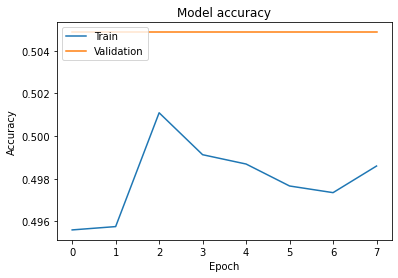

In [100]:
plt.plot(LSTM_NET_uni.history['accuracy'])
plt.plot(LSTM_NET_uni.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

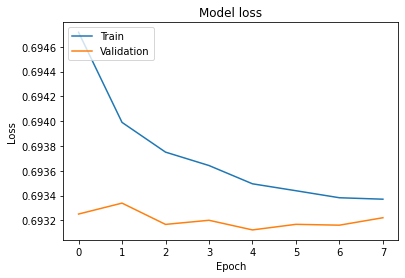

In [101]:
plt.plot(LSTM_NET_uni.history['loss'])
plt.plot(LSTM_NET_uni.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [102]:
print(classification_report(lstm_uni.predict(test_sentences).round(), test_tags))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       1.00      0.50      0.66      9999

    accuracy                           0.50     10000
   macro avg       0.50      0.25      0.33     10000
weighted avg       1.00      0.50      0.66     10000



### Bi-Directional LSTM

In [103]:
lstm = Models.Sequential()

lstm.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                          embeddings_initializer = Init.Constant(words2vec_matrix),
                          input_length=MAX_LEN, trainable=False ))

lstm.add(Layers.Bidirectional(Layers.LSTM(256, activation='tanh')))

lstm.add(Layers.Dense(128, activation='tanh'))
lstm.add(Layers.Dropout(0.5))

lstm.add(Layers.Dense(64, activation='tanh'))
lstm.add(Layers.Dropout(0.5))

lstm.add(Layers.Dense(1, activation='sigmoid'))

lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1398, 128)         13039616  
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               788480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [104]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
 

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3) 
LSTM_NET = lstm.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/10
1000/1000 [==============================] - 212s 209ms/step - loss: 0.5476 - accuracy: 0.7329 - val_loss: 0.3787 - val_accuracy: 0.8320
Epoch 2/10
1000/1000 [==============================] - 208s 208ms/step - loss: 0.3965 - accuracy: 0.8309 - val_loss: 0.3716 - val_accuracy: 0.8385
Epoch 3/10
1000/1000 [==============================] - 209s 209ms/step - loss: 0.3497 - accuracy: 0.8519 - val_loss: 0.3523 - val_accuracy: 0.8500
Epoch 4/10
1000/1000 [==============================] - 208s 208ms/step - loss: 0.3208 - accuracy: 0.8681 - val_loss: 0.3454 - val_accuracy: 0.8520
Epoch 5/10
1000/1000 [==============================] - 208s 208ms/step - loss: 0.2865 - accuracy: 0.8855 - val_loss: 0.3642 - val_accuracy: 0.8514
Epoch 6/10
1000/1000 [==============================] - 208s 208ms/step - loss: 0.2546 - accuracy: 0.9030 - val_loss: 0.4025 - val_accuracy: 0.8577
Epoch 7/10
1000/1000 [==============================] - 209s 209ms/step - loss: 0.2130 - accuracy: 0.9241 - val_

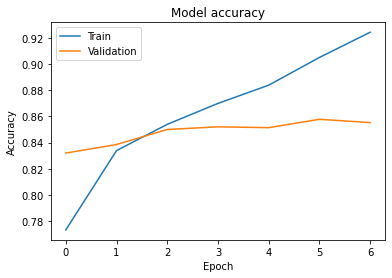

In [105]:
plt.plot(LSTM_NET.history['accuracy'])
plt.plot(LSTM_NET.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

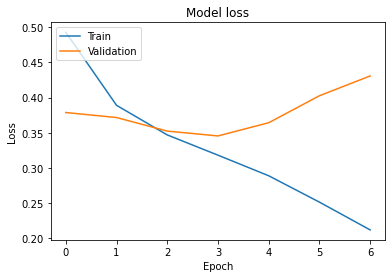

In [106]:
plt.plot(LSTM_NET.history['loss'])
plt.plot(LSTM_NET.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [107]:
print(classification_report(lstm.predict(test_sentences).round(), test_tags))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84      4564
         1.0       0.90      0.82      0.85      5436

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## 6.2 GRUs

### Uni-Directional GRU

In [108]:
from keras.layers import Embedding, GRU, Dense, Dropout

gru_uni = Sequential()
gru_uni.add(Embedding(VOCAB_SIZE+1, DIMENSIONS,
                      embeddings_initializer=Init.Constant(words2vec_matrix),
                      input_length=MAX_LEN, trainable=False))
gru_uni.add(GRU(256, activation='tanh'))
gru_uni.add(Dense(128, activation='tanh'))
gru_uni.add(Dropout(0.5))
gru_uni.add(Dense(64, activation='tanh'))
gru_uni.add(Dropout(0.5))
gru_uni.add(Dense(1, activation='sigmoid'))

gru_uni.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1398, 128)         13039616  
_________________________________________________________________
gru (GRU)                    (None, 256)               296448    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [109]:
gru_uni.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3)
GRU_NET_uni = gru_uni.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/10
1000/1000 [==============================] - 93s 92ms/step - loss: 0.6950 - accuracy: 0.4959 - val_loss: 0.6939 - val_accuracy: 0.5049
Epoch 2/10
1000/1000 [==============================] - 91s 91ms/step - loss: 0.6945 - accuracy: 0.5011 - val_loss: 0.6936 - val_accuracy: 0.5049
Epoch 3/10
1000/1000 [==============================] - 91s 91ms/step - loss: 0.6941 - accuracy: 0.4992 - val_loss: 0.6933 - val_accuracy: 0.5049
Epoch 4/10
1000/1000 [==============================] - 91s 91ms/step - loss: 0.6935 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5049
Epoch 5/10
1000/1000 [==============================] - 91s 91ms/step - loss: 0.6937 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.5049
Epoch 6/10
1000/1000 [==============================] - 91s 91ms/step - loss: 0.6934 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5049
Epoch 7/10
1000/1000 [==============================] - 91s 91ms/step - loss: 0.6935 - accuracy: 0.5001 - val_loss: 0.6932 -

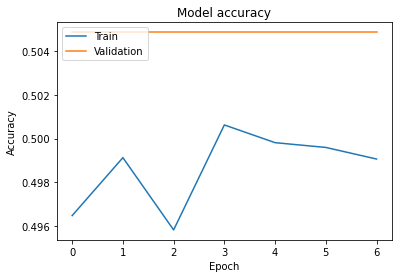

In [110]:
plt.plot(GRU_NET_uni.history['accuracy'])
plt.plot(GRU_NET_uni.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

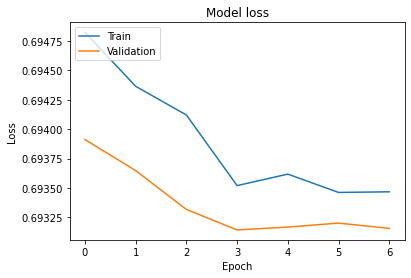

In [111]:
plt.plot(GRU_NET_uni.history['loss'])
plt.plot(GRU_NET_uni.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [112]:
print(classification_report(gru_uni.predict(test_sentences).round(), test_tags))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       1.00      0.50      0.66      9999

    accuracy                           0.50     10000
   macro avg       0.50      0.25      0.33     10000
weighted avg       1.00      0.50      0.66     10000



### Bi-Directional GRU

In [81]:
from keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout

gru_bi = Sequential()
gru_bi.add(Embedding(VOCAB_SIZE+1, DIMENSIONS,
                     embeddings_initializer=Init.Constant(words2vec_matrix),
                     input_length=MAX_LEN, trainable=False))
gru_bi.add(Bidirectional(GRU(256, activation='tanh', dropout=0.2)))
gru_bi.add(Dense(128, activation='tanh'))
gru_bi.add(Dropout(0.5))
gru_bi.add(Dense(64, activation='tanh'))
gru_bi.add(Dropout(0.5))
gru_bi.add(Dense(1, activation='sigmoid'))

gru_bi.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 1398, 128)         13039616  
_________________________________________________________________
bidirectional_8 (Bidirection (None, 512)               592896    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)               

In [82]:
gru_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3)
GRU_NET_bi = gru_bi.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/10
1000/1000 [==============================] - 174s 172ms/step - loss: 0.5862 - accuracy: 0.6949 - val_loss: 0.3819 - val_accuracy: 0.8324
Epoch 2/10
1000/1000 [==============================] - 171s 171ms/step - loss: 0.3833 - accuracy: 0.8359 - val_loss: 0.3732 - val_accuracy: 0.8426
Epoch 3/10
1000/1000 [==============================] - 172s 172ms/step - loss: 0.3478 - accuracy: 0.8555 - val_loss: 0.3635 - val_accuracy: 0.8450
Epoch 4/10
1000/1000 [==============================] - 172s 172ms/step - loss: 0.3342 - accuracy: 0.8585 - val_loss: 0.3486 - val_accuracy: 0.8506
Epoch 5/10
1000/1000 [==============================] - 171s 171ms/step - loss: 0.3010 - accuracy: 0.8798 - val_loss: 0.3546 - val_accuracy: 0.8508
Epoch 6/10
1000/1000 [==============================] - 172s 172ms/step - loss: 0.2896 - accuracy: 0.8828 - val_loss: 0.3622 - val_accuracy: 0.8551
Epoch 7/10
1000/1000 [==============================] - 174s 174ms/step - loss: 0.2614 - accuracy: 0.8981 - val_

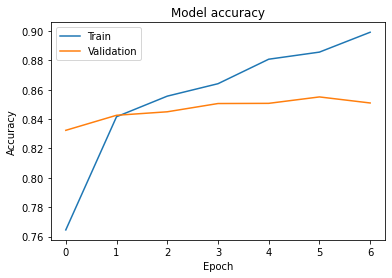

In [83]:
plt.plot(GRU_NET_bi.history['accuracy'])
plt.plot(GRU_NET_bi.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

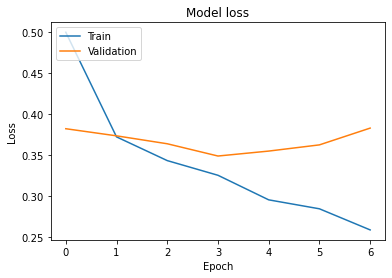

In [84]:
plt.plot(GRU_NET_bi.history['loss'])
plt.plot(GRU_NET_bi.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [85]:
print(classification_report(gru_bi.predict(test_sentences).round(), test_tags))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      4795
         1.0       0.87      0.86      0.87      5205

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

